In [6]:
# Install CorEx 
!pip install corextopic
!pip install networkx

## Connect to database

In [3]:
import os
import pymongo
import pandas as pd
from pprint import pprint
from dotenv import load_dotenv
from helpers import connect_to_db

In [4]:
client = connect_to_db()
db = client.accounts # connect to my database

posts = db['posts'] # collection of posts
authors = db['authors'] # collection of authors

cursor = posts.find()
entries = list(cursor)

df = pd.DataFrame(entries)
df.head()

,_id,account,post_id,likes,comments,date,content,hashtags,number_hashtags,img_text,number_emojis,mentions,emoji_terms,pre_cleaned_text,url_email
0,5f34706c8091264adc7b3c0f,mindfulmft,ierq6xRnBL,55,1,2013-12-28 15:53:14,#therapy #positivequotes #quotes #marriage #re...,guidance challenge mentalhealth quotes positiv...,14,true humility is staying teachabl,0.0,,,,
1,5f34706d8091264adc7b3c11,mindfulmft,ietVO_RnD_,33,0,2013-12-28 16:07:45,#motivation #love #power #encourage #journey #...,journey power forward relationship encourage a...,14,YOU ARE FAR Coo. pnart- TO BE THE ONLY THING S...,0.0,,,,
2,5f34706d8091264adc7b3c12,mindfulmft,ietrkpRnEl,65,1,2013-12-28 16:10:48,#storms #accomplishments #roots #strength #liv...,storms wisdom forward relationship encourageme...,15,Storms make trees take deeper root ss - Dolly ...,0.0,,,,
3,5f34706d8091264adc7b3c13,mindfulmft,ieum0hxnF-,39,1,2013-12-28 16:18:53,#words #self #life #MINDFULMFT #mindfulness #c...,wisdom control encouragement lessons motivatio...,13,- Let anyone determine your self-worth. = Spea...,0.0,,,,
4,5f34706d8091264adc7b3c14,mindfulmft,jH1aVfxnDG,61,1,2014-01-13 15:27:13,#truth #wisdom #wise #think #act #motivation #...,think wisdom wise family counseling encourage ...,16,Most of the problems in life are because of tw...,0.0,,,,


In [41]:
df.iloc[df[df['img_text'].isna()].index, list(df.columns).index('img_text')].replace(np.nan, "", inplace=True)

In [45]:
df['all_text'] = df.pre_cleaned_text + df.hashtags

In [57]:
df.pre_cleaned_text

0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
                               ...                        
14861    i am so excited to share my collaboration with...
14862                             speak it out loud loves!
14863        here is to a weekend with some time for you x
14864    Because self-care is community care. Community...
14865    During this time of collective healing, I have...
Name: pre_cleaned_text, Length: 14866, dtype: object

## Import libraries

In [58]:
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(df.all_text)
words = list(np.asarray(vectorizer.get_feature_names()))

In [55]:
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.pre_cleaned_text)

In [56]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: feel,does,way,just,know,people,need,want,person,make
1: self,body,trauma,emotional,child,behavior,practice,nervous,brain,emotions
2: like,time,work,partner,did,look,experience,lot,world,doing
3: mentalhealthawareness,mentalhealth,selflove,mentalhealthadvocate,intentionalliving,shermanoakstherapist,emdrtherapy,radicalselflove,communicationskills,istatements
4: relationshiptherapy,selfhealers,complexptsd,complextrauma,cptsdrecovery,traumahealing,ptsdrecovery,cptsdsurvivor,therapytools,healing
5: bio,link,join,week,check,mental,book,health,event,tickets


In [53]:
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(6)])
predictions.tail(6)

,topic0,topic1,topic2,topic3,topic4,topic5
14860,False,False,False,False,False,False
14861,False,False,True,False,True,True
14862,False,False,False,False,False,False
14863,False,False,False,False,False,False
14864,False,False,False,False,False,False
14865,True,True,True,False,True,True


In [52]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=2, n_docs=2)

[('We all have blind spots. We all struggle with understanding parts of ourselves, especially when we are in the thick of an emotional reaction. It is quite hard to be self reflective and introspective when we are defending ourselves and hurting. It is also hard to understand ourselves when we have avoidant and invulnerable. Every which way, there are times when we can not see the message or lesson in front of us, and other times when we just do not want to. That is why the people who lean into us even when we are leaning away from ourselves are some of the most beautiful souls to ever walk into our lives. These people make us a priority. They make growth, transformation, and healing a priority. These people look out for us and say if you can not love yourself through it I will. No, they are not responsible for us, but loving relationships swoop in from time to time to offer us what it is we can not always give ourselves. I can not tell you how many times I have thought I understood my

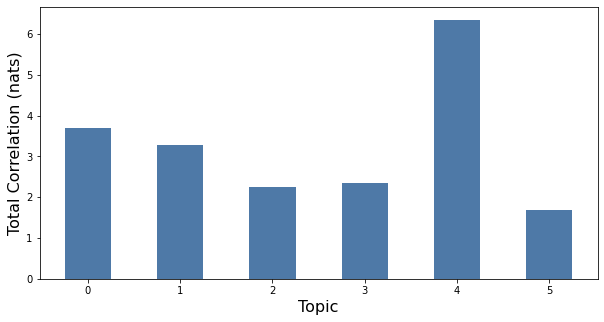

In [54]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);